# XGBoost 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

train_data = pd.read_csv('C:/Users/amres/Desktop/Kaggle ML/House price prediction data/train.csv')
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.fit_transform(test_X)

In [2]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=100, n_jobs=2, learning_rate=0.111)
my_model.fit(train_X, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.111, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=2, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [3]:
# make predictions

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 16657.40606806507


In [4]:
## saving the predicted values in a 

my_submission = pd.DataFrame({"SalePrice": predictions})
my_submission.to_csv('Desktop\submission.csv', index = True)

# Partial Dependence plots

In [70]:
## plotting partial dependent plots 

def get_data():
    data = pd.read_csv('C:/Users/amres/Desktop/Kaggle ML/data/train.csv')
    y = data.SalePrice
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

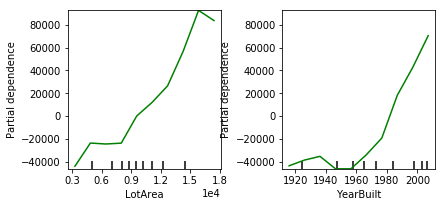

In [92]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

X, y = get_data()

my_model = GradientBoostingRegressor()
my_model.fit(X, y)
cols_to_use = ['LotArea', 'YearBuilt']

plot = plot_partial_dependence(my_model, 
                               features=[0,1], 
                               X=X, 
                               feature_names=cols_to_use, 
                               grid_resolution=10)